<a href="https://colab.research.google.com/github/AlejandroTorres33/data-analysis-python/blob/main/Tratamiento_de_datos_a_registro_de_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tratamiento de datos a registro de ventas**

Se cuenta con un total de mil registros los cuales contienen información acerca de las ventas de una empresa. Cada registro cuenta con:

*   ID del cliente, Zona, País, Tipo de producto, Canal de venta, Prioridad, Fecha del pedido, ID del pedido, Fecha de envío, Unidades pedidas, Precio Unitario, Coste Unitario, Importe venta total, Importe coste total.

Los datos son mostrados en la siguiente tabla:







> Se importan las librerías y carpetas necesarias.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

> Se cargan los datos de ventas.

In [4]:
from google.colab import drive

drive.mount('/content/drive')
rootFolder = '/content/drive/MyDrive/CÓDIGOS/PRUEBA/'
salesDataFile = rootFolder + 'Registros de ventas.xlsx'

salesData = pd.read_excel(salesDataFile)
salesData

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID Cliente,Zona,País,Tipo de producto,Canal de venta,Prioridad,Fecha pedido,ID Pedido,Fecha envío,Unidades,Precio Unitario,Coste Unitario,Importe venta total,Importe Coste total
0,C2421,Europa,United Kingdom,Snacks,Offline,Crítica,2020-10-12,242113196,2020-11-30,5530,152.58,97.44,843767.40,538843.20
1,C1908,Europa,Malta,Cárnicos,Online,Alta,2020-01-26,190800607,2020-01-28,994,421.89,364.69,419358.66,362501.86
2,C7652,Australia y Oceanía,Marshall Islands,Cereales,Online,Crítica,2020-11-09,765228068,2020-11-21,6845,205.70,117.11,1408016.50,801617.95
3,C2326,África,Iran,Frutas,Offline,Baja,2021-08-21,232631909,2021-10-02,9806,9.33,6.92,91489.98,67857.52
4,C5305,Centroamérica y Caribe,Guatemala,Alimento infantil,Offline,Media,2022-09-30,530560958,2022-11-12,3633,255.28,159.42,927432.24,579172.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C1627,África,Malawi,Bebida,Online,Alta,2022-08-04,162745130,2022-08-19,8755,47.45,31.79,415424.75,278321.45
996,C4408,Asia,India,Cuidado personal,Offline,Crítica,2022-04-17,440898787,2022-06-01,604,81.73,56.67,49364.92,34228.68
997,C2808,Asia,Tajikistan,Frutas,Online,Media,2020-04-29,280876481,2020-05-31,6447,9.33,6.92,60150.51,44613.24
998,C8608,Europa,Finland,Verduras,Online,Baja,2020-09-09,860852038,2020-09-15,4103,154.06,90.93,632108.18,373085.79


> Resumen de los datos.

In [5]:
rows = ['NaN Data', '# NaN Data','Data Type']
salesDataDetails = [salesData.isna().any().values, salesData.isna().sum(), salesData.dtypes.values]
salesDataExploration = pd.DataFrame(salesDataDetails, index = rows, columns = salesData.columns.values)
salesDataExploration

,ID Cliente,Zona,País,Tipo de producto,Canal de venta,Prioridad,Fecha pedido,ID Pedido,Fecha envío,Unidades,Precio Unitario,Coste Unitario,Importe venta total,Importe Coste total
NaN Data,False,False,False,False,False,False,False,False,False,False,False,False,False,False
# NaN Data,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Data Type,object,object,object,object,object,object,datetime64[ns],int64,datetime64[ns],int64,float64,float64,float64,float64


In [6]:
salesData.describe()

,ID Pedido,Unidades,Precio Unitario,Coste Unitario,Importe venta total,Importe Coste total
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03
mean,5.436465e+08,5024.481000,260.837200,184.077810,1.289102e+06,9.070765e+05
std,2.608658e+08,2818.856568,216.124374,175.040935,1.411287e+06,1.102814e+06
min,1.008848e+08,1.000000,9.330000,6.920000,4.745000e+01,3.179000e+01
25%,3.106750e+08,2666.500000,81.730000,35.840000,3.007910e+05,1.705794e+05
50%,5.417702e+08,5125.500000,154.060000,97.440000,7.444941e+05,4.592834e+05
75%,7.784109e+08,7473.750000,421.890000,263.330000,1.773422e+06,1.173904e+06
max,9.987918e+08,9989.000000,668.270000,524.960000,6.618546e+06,5.068489e+06


# Utilidades

In [7]:
cabeceras = ['ID Cliente', 'Zona', 'Utilidad * Unidad Pedida', 'Utilidad * Pedido']
utilityData = [salesData['ID Cliente'], salesData['Zona'], salesData['Precio Unitario'].subtract(salesData['Coste Unitario']).values, salesData['Precio Unitario'].subtract(salesData['Coste Unitario']).mul(salesData['Unidades']).values]
utilities = pd.DataFrame(columns = cabeceras)

for column in range(0, utilities.shape[1]):
  utilities[cabeceras[column]] = utilityData[column]

utilities

,ID Cliente,Zona,Utilidad * Unidad Pedida,Utilidad * Pedido
0,C2421,Europa,55.14,304924.20
1,C1908,Europa,57.20,56856.80
2,C7652,Australia y Oceanía,88.59,606398.55
3,C2326,África,2.41,23632.46
4,C5305,Centroamérica y Caribe,95.86,348259.38
...,...,...,...,...
995,C1627,África,15.66,137103.30
996,C4408,Asia,25.06,15136.24
997,C2808,Asia,2.41,15537.27
998,C8608,Europa,63.13,259022.39


In [8]:
print('Total de ingresos: ', sum(utilities['Utilidad * Pedido']))

Total de ingresos:  382025379.42999995


**Utilidades por cliente**



In [9]:
utilitiesByClient = utilities.groupby(utilities['ID Cliente']).sum()
utilitiesByClient

<ipython-input-9-c2a708df11df>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  utilitiesByClient = utilities.groupby(utilities['ID Cliente']).sum()


,Utilidad * Unidad Pedida,Utilidad * Pedido
ID Cliente,,
C1008,95.86,279048.46
C1061,126.25,890820.00
C1062,88.59,858791.46
C1069,162.03,1226017.53
C1089,2.41,17115.82
...,...,...
C9949,63.13,93179.88
C9950,95.86,512946.86
C9962,88.59,668322.96


> Clientes que han generado mayor cantidad de ingresos

In [10]:
topUtilitiesByClient = utilitiesByClient.sort_values(by = 'Utilidad * Pedido', ascending=False)
topUtilitiesByClient

,Utilidad * Unidad Pedida,Utilidad * Pedido
ID Cliente,,
C3324,220.87,2150600.38
C1559,239.17,2017163.53
C5958,173.87,1691755.10
C5737,173.87,1690190.27
C4725,261.59,1675916.12
...,...,...
C7854,57.20,572.00
C1302,2.41,486.82
C1385,2.41,277.15


**Utilidades por zona**

In [11]:
utilitiesByZone = utilities.groupby(utilities['Zona']).sum()
utilitiesByZone

<ipython-input-11-7e0e1281a300>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  utilitiesByZone = utilities.groupby(utilities['Zona']).sum()


,Utilidad * Unidad Pedida,Utilidad * Pedido
Zona,,
Asia,11749.38,5.736789e+07
Australia y Oceanía,7755.22,3.610953e+07
Centroamérica y Caribe,8207.76,4.546323e+07
Europa,18345.25,8.672729e+07
Norteamérica,1836.01,7.824286e+06
África,28865.77,1.485332e+08


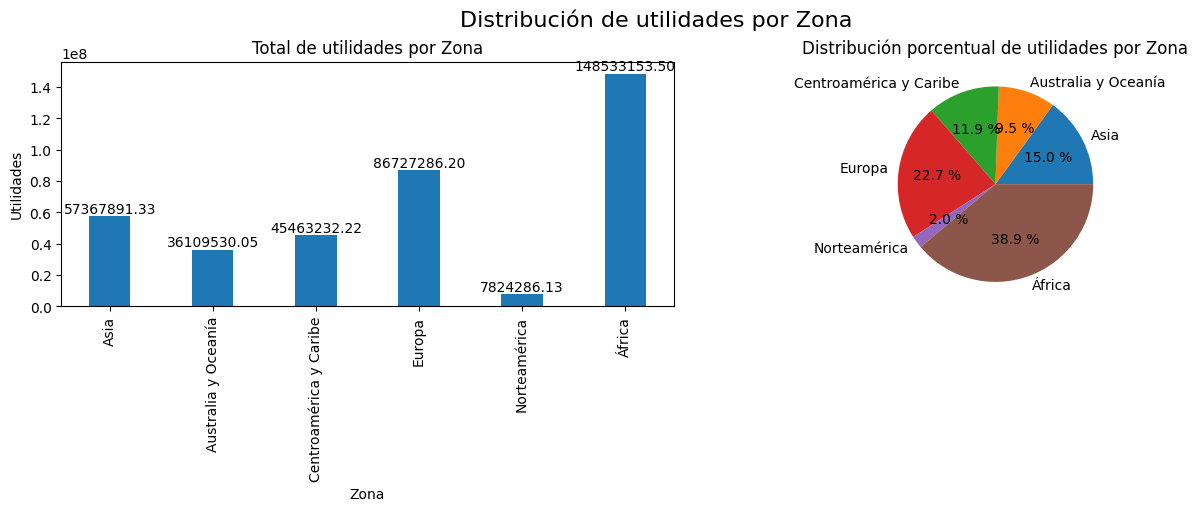

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13, 5), layout='constrained')
ax1.bar(utilitiesByZone.index, utilitiesByZone['Utilidad * Pedido'], width=0.4)
ax1.tick_params(axis='x', rotation=90)
ax1.set_title("Total de utilidades por Zona")
ax1.set_xlabel('Zona')
ax1.set_ylabel('Utilidades')
ax1.bar_label(ax1.containers[0], fmt='%.2f')

ax2.pie(utilitiesByZone['Utilidad * Pedido'], labels = utilitiesByZone.index, autopct="%0.1f %%")
ax2.set_title("Distribución porcentual de utilidades por Zona")

fig.suptitle("Distribución de utilidades por Zona", fontsize=16)
plt.show()

**Utilidades por fecha de pedido**

In [13]:
cabeceras = ['ID Cliente', 'Prioridad', 'Fecha pedido', 'Año', 'Mes', 'Utilidad * Unidad Pedida', 'Utilidad * Pedido']
utilityData = [salesData['ID Cliente'], salesData['Prioridad'], salesData['Fecha pedido'], salesData['Fecha pedido'].dt.year, salesData['Fecha pedido'].dt.month, salesData['Precio Unitario'].subtract(salesData['Coste Unitario']).values, salesData['Precio Unitario'].subtract(salesData['Coste Unitario']).mul(salesData['Unidades']).values]
utilities = pd.DataFrame(columns = cabeceras)

for column in range(0, utilities.shape[1]):
  utilities[cabeceras[column]] = utilityData[column]

utilities

,ID Cliente,Prioridad,Fecha pedido,Año,Mes,Utilidad * Unidad Pedida,Utilidad * Pedido
0,C2421,Crítica,2020-10-12,2020,10,55.14,304924.20
1,C1908,Alta,2020-01-26,2020,1,57.20,56856.80
2,C7652,Crítica,2020-11-09,2020,11,88.59,606398.55
3,C2326,Baja,2021-08-21,2021,8,2.41,23632.46
4,C5305,Media,2022-09-30,2022,9,95.86,348259.38
...,...,...,...,...,...,...,...
995,C1627,Alta,2022-08-04,2022,8,15.66,137103.30
996,C4408,Crítica,2022-04-17,2022,4,25.06,15136.24
997,C2808,Media,2020-04-29,2020,4,2.41,15537.27
998,C8608,Baja,2020-09-09,2020,9,63.13,259022.39


In [16]:
utilitiesByDate = utilities.pivot_table(values = ['Utilidad * Pedido'], index = ['Año', 'Mes'])
utilitiesByDate

Utilidad * Pedido
Año  Mes                   
2020 1        454755.528182
     2        359005.288750
     3        418516.306800
     4        394635.779355
     5        386908.469583
     6        412391.963810
     7        302087.133448
     8        367266.493846
     9        381336.822903
     10       469860.823871
     11       484036.631613
     12       392177.579687
2021 1        373016.863235
     2        457914.779697
     3        471319.765312
     4        487312.941600
     5        405458.650667
     6        354578.093750
     7        337012.574706
     8        514741.150303
     9        349420.457500
     10       295896.822143
     11       357790.341250
     12       267258.997500
2022 1        356627.555937
     2        367055.251818
     3        474103.341500
     4        349850.256579
     5        359274.215200
     6        324585.091786
     7        337836.998788
     8        389724.542609
     9        324557.097600
     10       243014.999524
     11       238712.956364

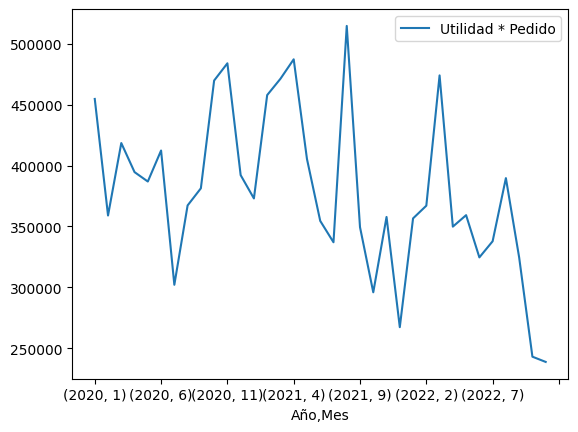

In [17]:
utilitiesByDate.plot()
plt.show()